In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
import plotly.express as px

In [92]:
df = pd.read_csv('shopping_data.csv')
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall
0,Female,37,Clothing,5,1500.40,Credit Card,2021-02-21,Istinye Park
1,Male,66,Clothing,3,900.24,Cash,2021-04-01,Mall of Istanbul
2,Female,50,Toys,2,71.68,Cash,2022-12-07,Kanyon
3,Male,64,Cosmetics,5,203.30,Cash,2022-02-03,Zorlu Center
4,Female,34,Food & Beverage,2,10.46,Cash,2021-08-04,Emaar Square Mall


In [104]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [108]:
df['Year'] = df['Datetime'].dt.year

In [110]:
df['Month'] = df['Datetime'].dt.month_name()

In [112]:
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall,Year,Month
0,Female,37,Clothing,5,1500.40,Credit Card,2021-02-21,Istinye Park,2021,February
1,Male,66,Clothing,3,900.24,Cash,2021-04-01,Mall of Istanbul,2021,April
2,Female,50,Toys,2,71.68,Cash,2022-12-07,Kanyon,2022,December
3,Male,64,Cosmetics,5,203.30,Cash,2022-02-03,Zorlu Center,2022,February
4,Female,34,Food & Beverage,2,10.46,Cash,2021-08-04,Emaar Square Mall,2021,August


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          10000 non-null  object        
 1   Age             10000 non-null  int64         
 2   Category        10000 non-null  object        
 3   Quantity        10000 non-null  int64         
 4   Price           10000 non-null  float64       
 5   Payment_method  10000 non-null  object        
 6   Datetime        10000 non-null  datetime64[ns]
 7   Shopping_mall   10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 625.1+ KB


In [45]:
df.describe()

,Age,Quantity,Price
count,10000.000000,10000.000000,10000.000000
mean,43.697600,2.991400,672.502592
std,15.098084,1.416943,921.825911
min,18.000000,1.000000,5.230000
25%,31.000000,2.000000,40.660000
50%,44.000000,3.000000,203.300000
75%,57.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [23]:
df['Category'].nunique()

8

In [39]:
# Total earnings per category

total_pay_per_cat = pd.DataFrame(df.groupby(['Category'])['Price'].sum().reset_index())
total_pay_per_cat

,Category,Price
0,Books,22867.70
1,Clothing,3121132.08
2,Cosmetics,192931.70
3,Food & Beverage,23064.30
4,Shoes,1819715.44
5,Souvenir,17610.62
6,Technology,1420650.00
7,Toys,107054.08


In [49]:
# Total customer per mall

total_cust_per_mall = pd.DataFrame(df.groupby(['Shopping_mall'])['Gender'].count().reset_index())
total_cust_per_mall

,Shopping_mall,Gender
0,Cevahir AVM,500
1,Emaar Square Mall,500
2,Forum Istanbul,474
3,Istinye Park,989
4,Kanyon,1925
5,Mall of Istanbul,2090
6,Metrocity,1508
7,Metropol AVM,1016
8,Viaport Outlet,486
9,Zorlu Center,512


In [204]:
# Total customer per mall per category

tot_cust_per_mal_per_cat = pd.DataFrame(df.groupby(['Shopping_mall','Category'])['Gender'].count().reset_index())
tot_cust_per_mal_per_cat

,Shopping_mall,Category,Gender
0,Cevahir AVM,Books,20
1,Cevahir AVM,Clothing,155
2,Cevahir AVM,Cosmetics,73
3,Cevahir AVM,Food & Beverage,95
4,Cevahir AVM,Shoes,60
...,...,...,...
75,Zorlu Center,Food & Beverage,77
76,Zorlu Center,Shoes,52
77,Zorlu Center,Souvenir,26
78,Zorlu Center,Technology,24


In [215]:
# Status of top performing mall

best_perform_mall = tot_cust_per_mal_per_cat[tot_cust_per_mal_per_cat['Shopping_mall'] == 'Mall of Istanbul']
best_perform_mall

,Shopping_mall,Category,Gender
40,Mall of Istanbul,Books,124
41,Mall of Istanbul,Clothing,724
42,Mall of Istanbul,Cosmetics,309
43,Mall of Istanbul,Food & Beverage,329
44,Mall of Istanbul,Shoes,187
45,Mall of Istanbul,Souvenir,91
46,Mall of Istanbul,Technology,103
47,Mall of Istanbul,Toys,223


In [208]:
# Total customer per mall per category (within specified delimiter)

tot_cust_per_mal_per_cat.query('Category == "Clothing" & Gender > 20')

,Shopping_mall,Category,Gender
1,Cevahir AVM,Clothing,155
9,Emaar Square Mall,Clothing,175
17,Forum Istanbul,Clothing,174
25,Istinye Park,Clothing,345
33,Kanyon,Clothing,656
41,Mall of Istanbul,Clothing,724
49,Metrocity,Clothing,535
57,Metropol AVM,Clothing,352
65,Viaport Outlet,Clothing,172
73,Zorlu Center,Clothing,171


In [210]:
# Total sale per year

total_sale_per_year = pd.DataFrame(df.groupby(['Year'])['Quantity'].sum().reset_index())
total_sale_per_year

,Year,Quantity
0,2021,13558
1,2022,13775
2,2023,2581


In [212]:
# Total sales per mall per year

qsale_per_mall_year = pd.DataFrame(df.groupby(['Year','Shopping_mall'])['Quantity'].sum().reset_index())
qsale_per_mall_year

,Year,Shopping_mall,Quantity
0,2021,Cevahir AVM,735
1,2021,Emaar Square Mall,721
2,2021,Forum Istanbul,609
3,2021,Istinye Park,1379
4,2021,Kanyon,2465
5,2021,Mall of Istanbul,2834
6,2021,Metrocity,2045
7,2021,Metropol AVM,1418
8,2021,Viaport Outlet,684
9,2021,Zorlu Center,668


In [221]:
# Total sales per category per month per year

tot_sale_per_cat_per_mon = df.groupby(['Year','Month','Category'])['Quantity'].sum().reset_index()
tot_sale_per_cat_per_mon

,Year,Month,Category,Quantity
0,2021,April,Books,28
1,2021,April,Clothing,435
2,2021,April,Cosmetics,160
3,2021,April,Food & Beverage,159
4,2021,April,Shoes,101
...,...,...,...,...
276,2023,September,Cosmetics,7
277,2023,September,Food & Beverage,22
278,2023,September,Shoes,10
279,2023,September,Souvenir,2


In [236]:
df.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Datetime,Shopping_mall,Year,Month
0,Female,37,Clothing,5,1500.40,Credit Card,2021-02-21,Istinye Park,2021,February
1,Male,66,Clothing,3,900.24,Cash,2021-04-01,Mall of Istanbul,2021,April
2,Female,50,Toys,2,71.68,Cash,2022-12-07,Kanyon,2022,December
3,Male,64,Cosmetics,5,203.30,Cash,2022-02-03,Zorlu Center,2022,February
4,Female,34,Food & Beverage,2,10.46,Cash,2021-08-04,Emaar Square Mall,2021,August


In [271]:
spend_by_age_on_cat = pd.DataFrame(df.groupby(['Age','Gender','Category'])['Price'].sum().reset_index())
spend_by_age_on_cat

,Age,Gender,Category,Price
0,18,Female,Books,363.60
1,18,Female,Clothing,30908.24
2,18,Female,Cosmetics,2236.30
3,18,Female,Food & Beverage,261.50
4,18,Female,Shoes,29408.33
...,...,...,...,...
820,69,Male,Food & Beverage,115.06
821,69,Male,Shoes,10202.89
822,69,Male,Souvenir,140.76
823,69,Male,Technology,23100.00


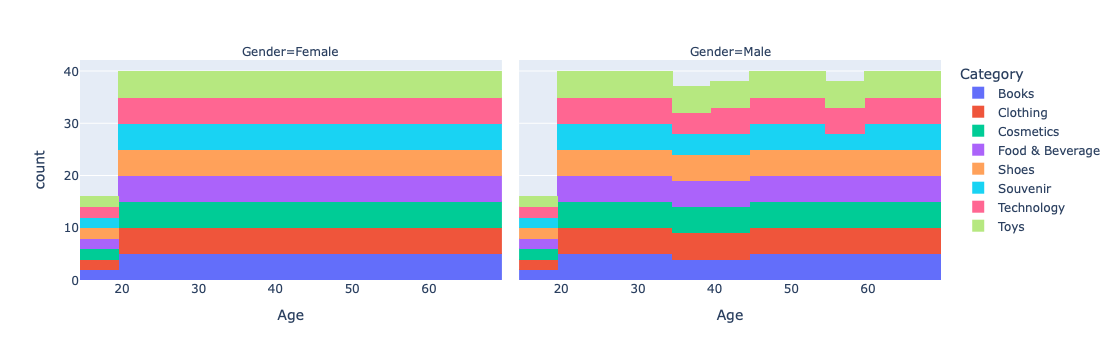

In [295]:
fig = px.histogram(spend_by_age_on_cat, x="Age", color="Category", facet_col='Gender')
fig.show()

In [299]:
# Total sales per age group

sales_per_agegrp = pd.DataFrame(df.groupby(['Age'])['Price'].sum().reset_index())
sales_per_agegrp

,Age,Price
0,18,139600.44
1,19,108382.23
2,20,125314.51
3,21,123692.33
4,22,137327.73
5,23,110223.16
6,24,158602.28
7,25,114754.77
8,26,134132.60
9,27,142039.96


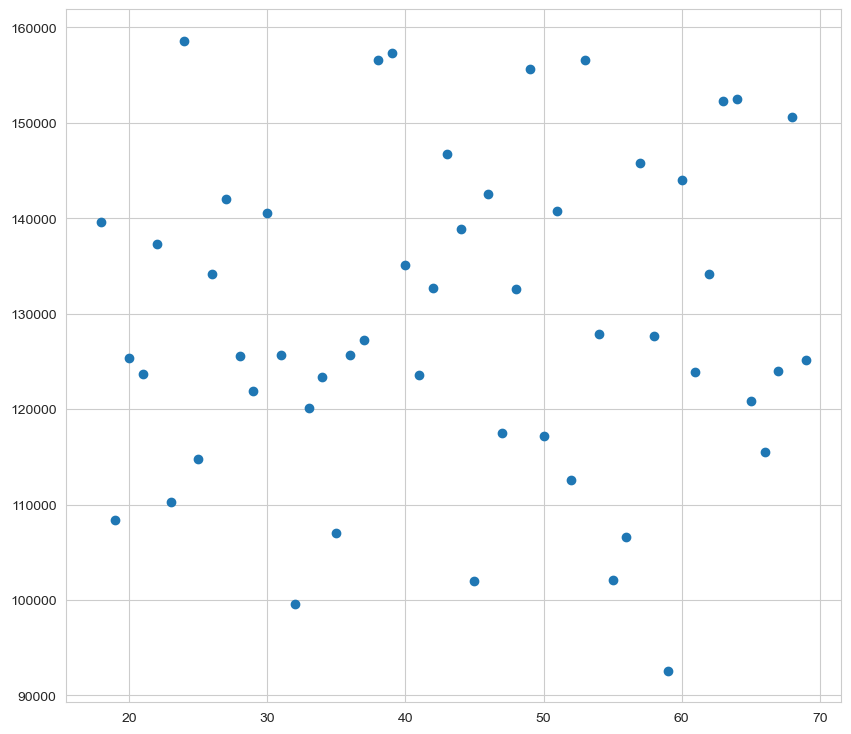

In [311]:
# Matplot-Scatter
fig, axes = plt.subplots(figsize=(10,9))
plt.scatter(data=sales_per_agegrp, x='Age', y='Price')

plt.show()